#### Project - Predictive Modeling
#### By Ajay Kumar

Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [ ]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Linear regression /Project Predictive Modeling/cubic_zirconia.csv')

In [ ]:
print(df.shape)
df.head()

(26967, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Exploratory Data Analysis

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
df.iloc[:,1:].describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [ ]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [ ]:
df['depth'] = df['depth'].fillna(df['depth'].mean())
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
for feature in df.columns:
  if df[feature].dtype == 'object':
    print(feature, 'Number of levls', df[feature].nunique())
    print(df[feature].value_counts())
    print('\n')

cut Number of levls 5
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


color Number of levls 7
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity Number of levls 8
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64




### Univariate Analysis

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 15,8
col = ['carat', 'depth', 'table', 'x','y', 'z', 'price']

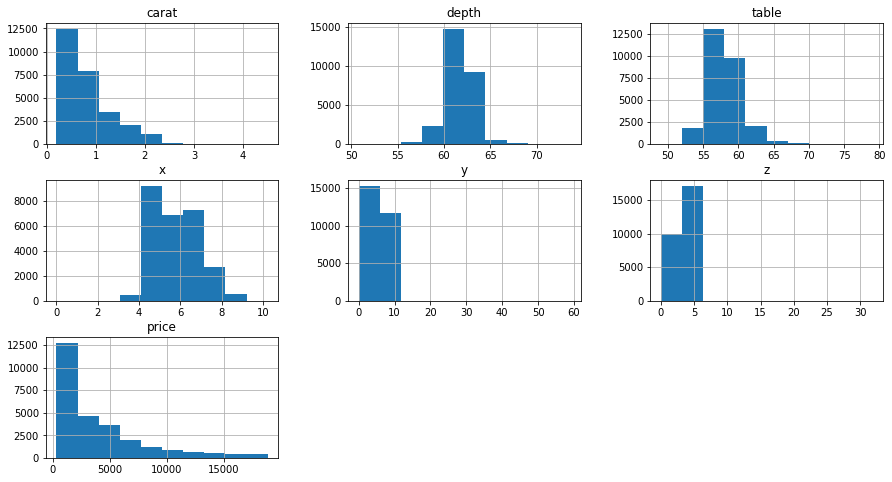

In [ ]:
df[col].hist();

In [ ]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [ ]:
df.head(10)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,1.02,61.5,56.0,6.46,6.49,3.99,9502,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1.01,63.7,60.0,6.35,6.30,4.03,4836,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0.50,61.5,62.0,5.09,5.06,3.12,1415,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,1.21,63.8,64.0,6.72,6.63,4.26,5407,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9,0.35,60.5,57.0,4.52,4.60,2.76,706,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.duplicated().sum()

34

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns= df.columns)
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254493,0.243737,-1.294498,-1.238697,-1.219208,-0.854828,-0.315271,1.221737,-0.586083,-0.536927,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668,-0.184970,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
1,-0.980684,-0.678194,0.243737,-1.161442,-1.092777,-1.163648,-0.734256,-0.315271,-0.818506,1.706244,-0.536927,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668,5.406277,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
2,0.213713,0.326238,1.139749,0.275562,0.332097,0.336455,0.584584,-0.315271,-0.818506,-0.586083,1.862451,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,3.105713
3,-0.792095,-0.104232,-0.652274,-0.806626,-0.800935,-0.802512,-0.709892,-0.315271,1.221737,-0.586083,-0.536927,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,2.364301,-0.540713,-0.270711,-0.321987
4,-1.022593,-0.965174,0.691743,-1.223534,-1.118527,-1.233097,-0.785219,-0.315271,1.221737,-0.586083,-0.536927,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,3.693976,-0.321987


In [ ]:
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26933 entries, 0 to 26932
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26933 non-null  float64
 2   table          26933 non-null  float64
 3   x              26933 non-null  float64
 4   y              26933 non-null  float64
 5   z              26933 non-null  float64
 6   price          26933 non-null  float64
 7   cut_Good       26933 non-null  float64
 8   cut_Ideal      26933 non-null  float64
 9   cut_Premium    26933 non-null  float64
 10  cut_Very Good  26933 non-null  float64
 11  color_E        26933 non-null  float64
 12  color_F        26933 non-null  float64
 13  color_G        26933 non-null  float64
 14  color_H        26933 non-null  float64
 15  color_I        26933 non-null  float64
 16  color_J        26933 non-null  float64
 17  clarity_IF     26933 non-null  float64
 18  clarit

In [ ]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [ ]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26933, 24)
After (26933, 24)


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

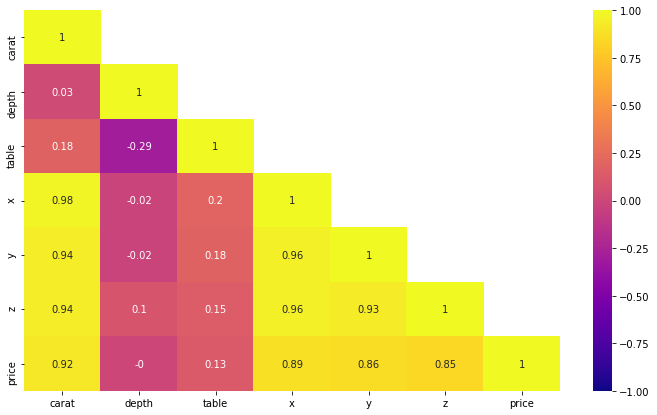

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:,0:7].corr().round(2), cmap='plasma', vmin=-1, 
            vmax=1, annot=True,
            mask=np.triu(df.iloc[:,0:7].corr(),+1));

### Checking for outliers

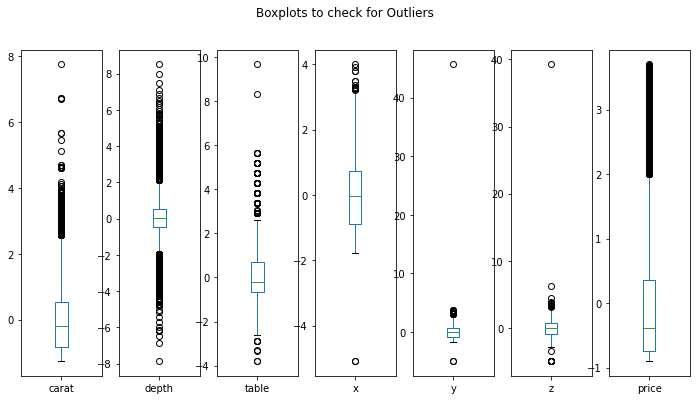

In [ ]:
df.iloc[:,0:7].plot(kind = 'box', figsize = (12,6),subplots = True,
             title = 'Boxplots to check for Outliers');

In [ ]:
def outlier_limits(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df.columns:
    lr,ur=outlier_limits(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

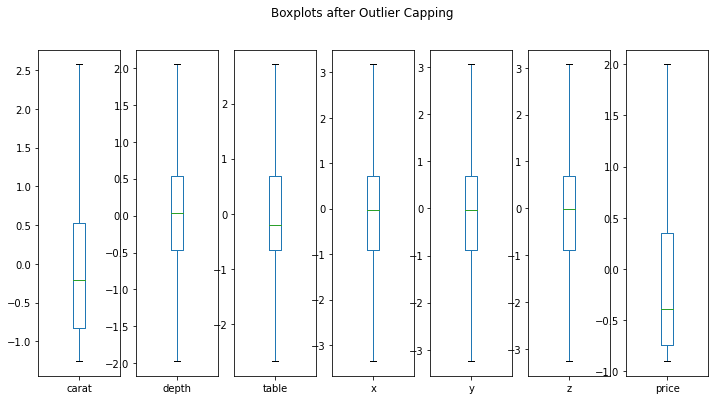

In [ ]:
  # Check if outliers have been capped

df.iloc[:,0:7].plot(kind = 'box', 
              title = 'Boxplots after Outlier Capping',
             figsize = (12,6),
             subplots = True);


## Bivariate analysis

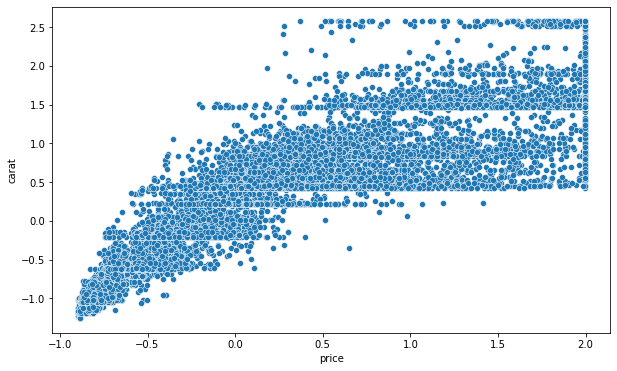

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'carat', data=df);

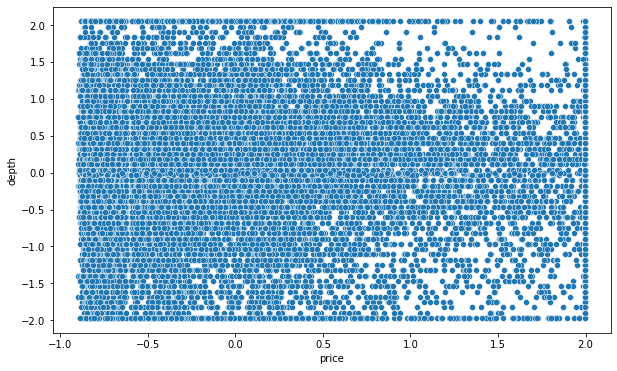

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'depth', data=df);

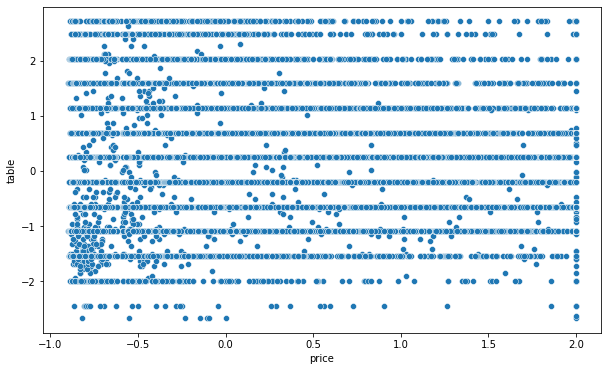

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'table', data=df);

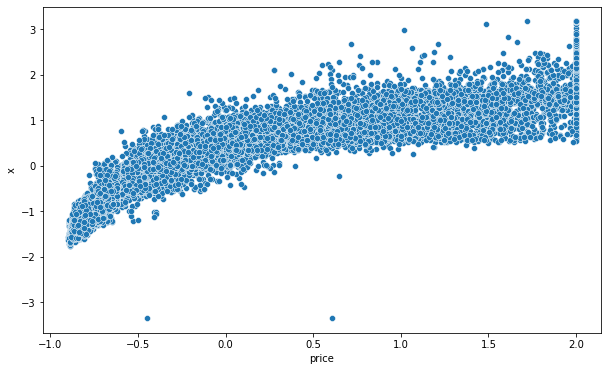

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'x', data=df);

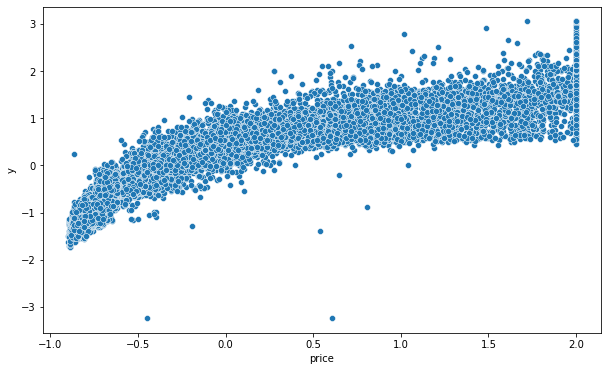

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'y', data=df);

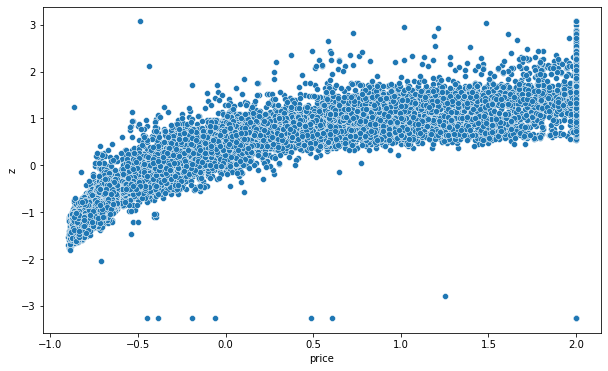

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y = 'z', data=df);

## Multivariate Analysis

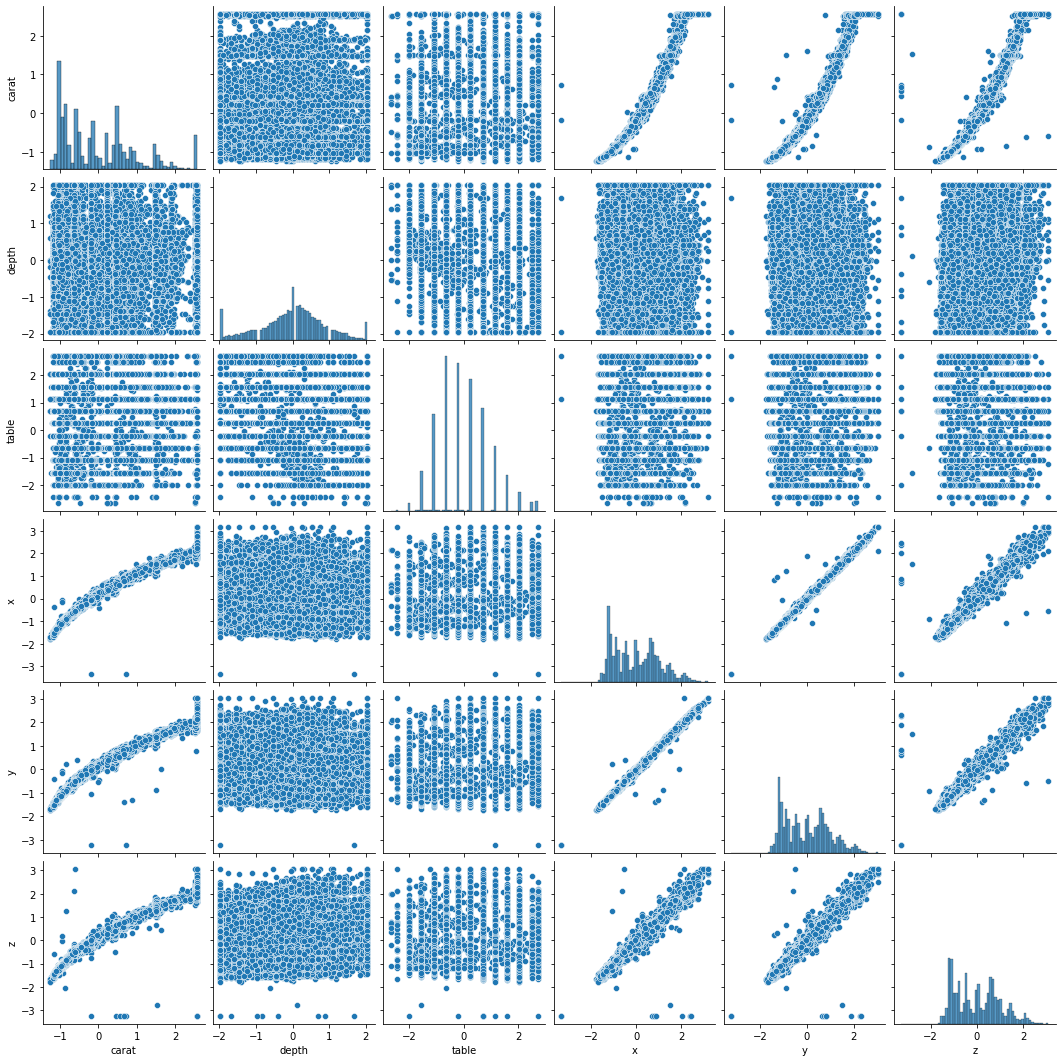

In [ ]:
sns.pairplot(df.iloc[:,0:6]);

# Train-Test Split

In [ ]:
# Copy all the predictor variables into X dataframe
X = round(df.drop('price', axis=1),3)

# Copy target into the y dataframe. 
y = round(df[['price']],3)

In [ ]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.044,0.254,0.244,-1.294,-1.239,-1.219,-0.315,1.222,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322
1,-0.981,-0.678,0.244,-1.161,-1.093,-1.164,-0.315,-0.819,1.706,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322
2,0.214,0.326,1.140,0.276,0.332,0.336,-0.315,-0.819,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322
3,-0.792,-0.104,-0.652,-0.807,-0.801,-0.803,-0.315,1.222,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322
4,-1.023,-0.965,0.692,-1.224,-1.119,-1.233,-0.315,1.222,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=1)

# Linear Regression Model

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.round(regression_model.coef_,3)

array([[ 1.069, -0.033, -0.026, -0.8  ,  0.66 , -0.055, -0.   ,  0.037,
         0.02 ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
        -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ]])

In [ ]:
# alternative better way of displaying the coefficients
pd.DataFrame(np.round(regression_model.coef_.reshape(23,-1),3), 
             columns=['Coefficient'],
            index = X_train.columns)

,Coefficient
carat,1.069
depth,-0.033
table,-0.026
x,-0.800
y,0.660
z,-0.055
cut_Good,-0.000
cut_Ideal,0.037
cut_Premium,0.020
cut_Very Good,0.000


In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0].round(3)

print(f"The intercept for our model is {intercept}")

The intercept for our model is -0.037


# Model Evaluation

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

0.8835375892485999

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8884484858550966

## RMSE

In [ ]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train)).round(3)

0.294

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test)).round(3)

0.288

In [ ]:
df.price.mean()

-0.05014171562665644

## Linear Regression using statsmodels

In [ ]:
# concatenate X and y into a single dataframe
# Since statsmodels library requires that data be passed as
# a single dataframe unlike sklearn which wants X and y as
# separate variables
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22092,-0.960,0.470,1.140,-1.170,-1.110,-1.080,-0.315,-0.819,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322,-0.845
2275,-1.044,-0.391,-1.100,-1.224,-1.222,-1.233,-0.315,1.222,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322,-0.769
19165,-0.624,0.541,-0.204,-0.567,-0.586,-0.511,-0.315,1.222,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322,-0.671
5029,0.633,1.115,-0.652,0.710,0.727,0.850,-0.315,-0.819,-0.586,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322,0.032
25384,0.465,-0.463,2.036,0.719,0.650,0.614,-0.315,-0.819,1.706,-0.537,-0.473,-0.461,-0.515,-0.423,-0.338,-0.238,-0.185,-0.568,-0.452,-0.423,-0.541,-0.271,-0.322,0.030


In [ ]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [ ]:
data_train.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True)

data_test.rename(columns={'cut_Very Good': 'cut_Very_Good'}, inplace=True) 

In [ ]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [ ]:
# write the formula string (similar to Anova)
expr= 'price ~ carat +depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+\
color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+\
clarity_VS2+clarity_VVS1+clarity_VVS2'

In [ ]:
import statsmodels.formula.api as smf #from..... import ols
lm1 = smf.ols(formula= expr, data = data_train).fit()
np.round(lm1.params,2)

Intercept       -3.600422e+08
carat            1.070000e+00
depth           -3.000000e-02
table           -3.000000e-02
x               -8.000000e-01
y                6.600000e-01
z               -5.000000e-02
cut_Good         6.522627e+07
cut_Ideal        4.000000e-02
cut_Premium      2.000000e-02
cut_Very_Good    5.882815e+09
color_E         -3.750299e+09
color_F          4.900767e+09
color_G         -5.754925e+08
color_H         -5.770320e+09
color_I         -4.422880e+09
color_J         -4.981446e+08
clarity_IF       1.009215e+09
clarity_SI1      6.981335e+09
clarity_SI2      6.937027e+09
clarity_VS1     -5.770320e+09
clarity_VS2     -8.474136e+09
clarity_VVS1    -3.603246e+09
clarity_VVS2     3.229463e+09
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:28:07   Log-Likelihood:                -3675.1
No. Observations:               18853   AIC:                             7370.
Df Residuals:                   18843   BIC:                             7449.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -3.6e+08   2.48e+09     -0.145

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [ ]:
# Calculate MSE
train_pred = lm1.predict(data_train.drop('price',axis=1))
mse_train = np.mean((train_pred-data_train['price'])**2)

In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_train)

0.2940499487518289

In [ ]:
np.sqrt(lm1.mse_resid) #another way to calculate training rmse

0.2941279647115874

In [ ]:
# Prediction on Test data
test_pred = lm1.predict(data_test)

In [ ]:
mse_test = np.mean((test_pred - data_test['price'])**2)
np.sqrt(mse_test) # rmse for test data predictions

0.28847262824917713

The final Linear Regression equation is  
  
<b>price = b0 + b1 * carat + b2 * depth + b3 * table + b4 *x + b5 *y + b6 *z + b7 * cut_Good + b8 *cut_Ideal + b9 *Premium + b10 *very_Good + b11 *color_E+ b12 * color_F + b13 * color_G + b14 * color_H + b15 * color_I + b16 * color_J + b17 * clarity_IF + b18 * clarity_SI1 + b19 * clarity_SI2 + b20 * clarity_VS1 + b21 * clarity_VS2 + b22 * clarity_VSS1 + b23 * clarity_VSS2 </b>

  
<b>price = -0.037 + 1.069 * carat + -0.033 * depth + -0.8 * table + 0.66 * x + -0.055 *y + 0 * z + 0.037 * cut_Good + 0.02 *cut_Ideal + 0 *Premium + 0 *very_Good + 0 *color_E+ 0 * color_F + 0 * color_G + 0 * color_H + 0 * color_I + 0 * color_J + 0 * clarity_IF + 0 * clarity_SI1 + 0 * clarity_SI2 + 0 * clarity_VS1 + 0 * clarity_VS2 + 0 * clarity_VSS1 + 0 * clarity_VSS2 </b>  

  
When carat increases by 1 unit, price increases by 1.069 units, keeping all other predictors constant.  
similarly, when depth increases by 1 unit, price decreased by -0.8 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.



# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Logistic Regression

In [ ]:
# Loading the Dataset
df1 = pd.read_csv('/content/drive/MyDrive/Data Science/Linear regression /Project Predictive Modeling/Holiday_Package.csv')

In [ ]:
print(df1.shape)
df1.head()

(872, 8)


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [ ]:
# Droping the ID columns
df1 = df1.drop('Unnamed: 0', axis=1)

# Exploratory Data Analysis

In [ ]:
# Information of the Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
# Statistical summary
df1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [ ]:
# Checking the class of categorical variable
for feature in df1.columns:
  if df1[feature].dtype == 'object':
    print(feature, ' No of levels', df1[feature].nunique())
    print(df1[feature].value_counts())
    print('\n')

Holliday_Package  No of levels 2
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign  No of levels 2
no     656
yes    216
Name: foreign, dtype: int64




In [ ]:
# Cheking the null values
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
# Checking the duplicates values
df1.duplicated().sum()

0

# Univariate Analysis

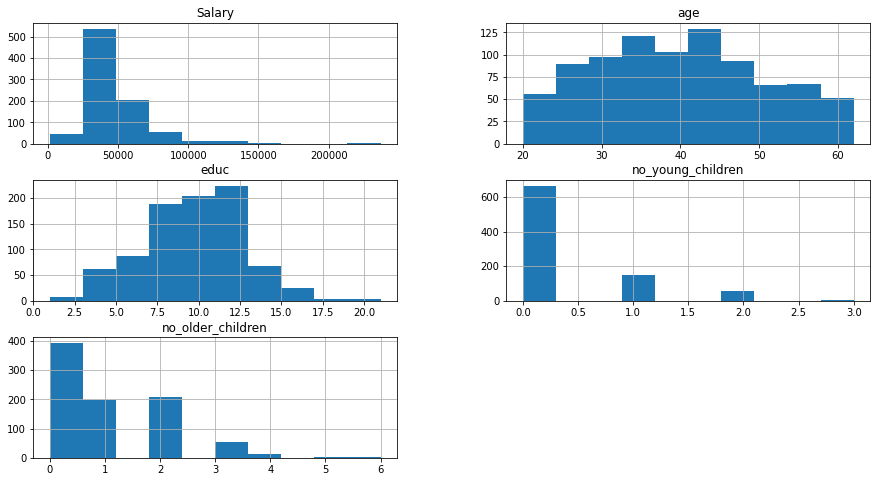

In [ ]:
# Univatiate Analysis
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
col1 = ['Salary', 'age', 'educ', 'no_young_children','no_older_children']
df1[col1].hist();

# Bivatiate Analysis


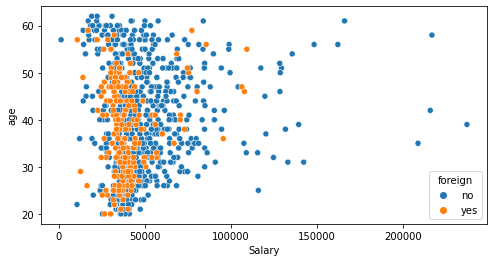

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Salary', y = 'age', data=df1, hue='foreign');

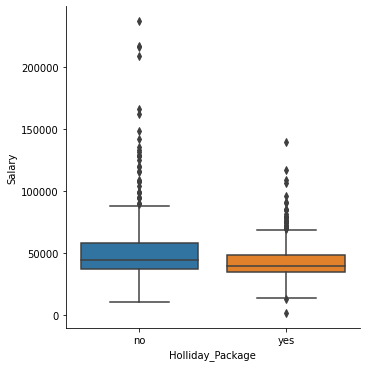

In [ ]:
sns.catplot(data = df1, x='Holliday_Package',y='Salary',
           kind = 'box');

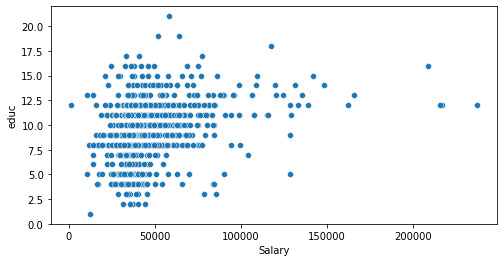

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Salary', y = 'educ', data=df1, );

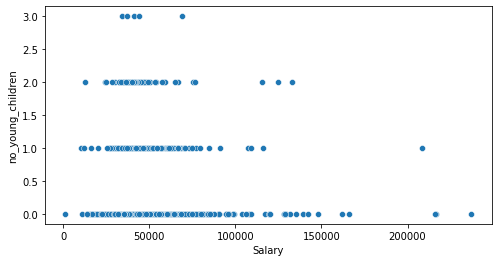

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Salary', y = 'no_young_children', data=df1);

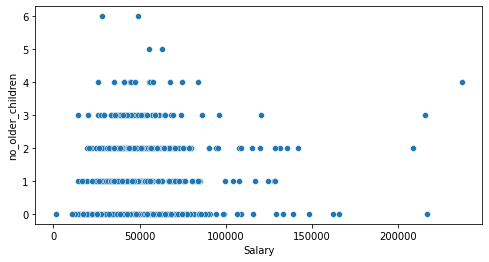

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Salary', y = 'no_older_children', data=df1);

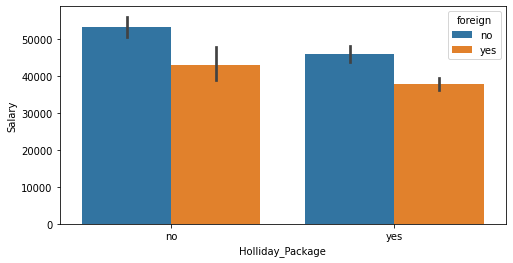

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x= 'Holliday_Package', y = 'Salary', data=df1, hue='foreign');

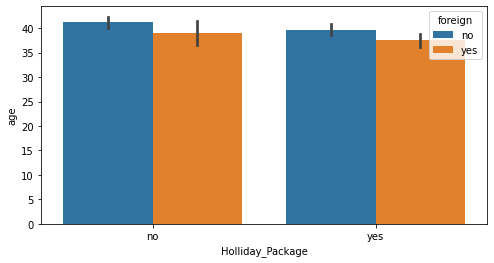

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x= 'Holliday_Package', y = 'age', data=df1, hue='foreign');

# Multivariate Analysis

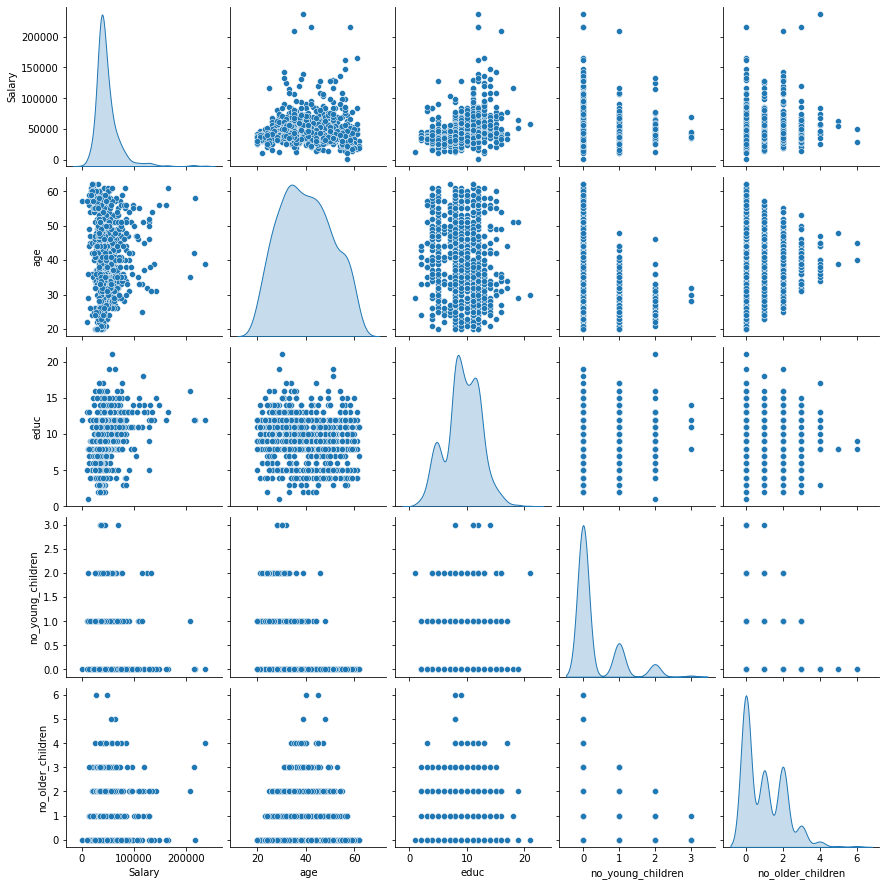

In [ ]:
sns.pairplot(df1.iloc[:,1:6], diag_kind='kde');

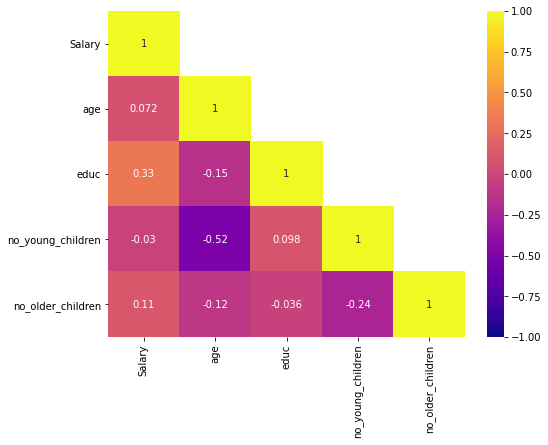

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.iloc[:,1:6].corr(), annot=True, vmax=1, vmin=-1, cmap='plasma', mask=np.triu(df1.iloc[:,1:6].corr(),+1) );

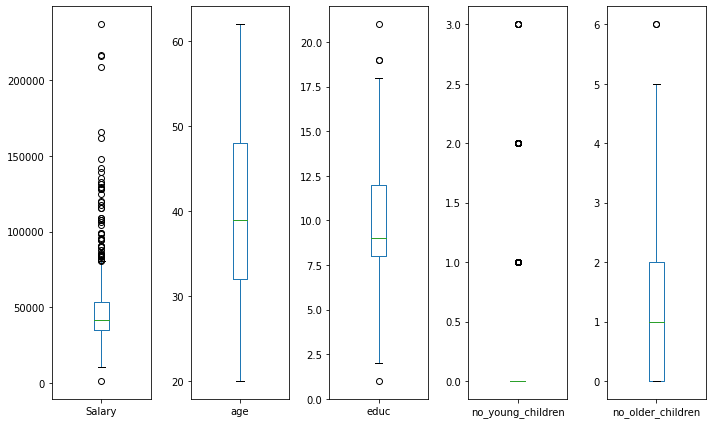

In [ ]:
# Checking for the outliers
df1.iloc[:,1:6].plot(kind = 'box', subplots = True, figsize= (10,6))
plt.tight_layout();

In [ ]:
def outlier_limits(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [ ]:
ol_col = ['Salary']
for col in ol_col:
    lr,ur=outlier_limits(df1[col])
    df1[col]=np.where(df1[col]>ur,ur,df1[col])
    df1[col]=np.where(df1[col]<lr,lr,df1[col])

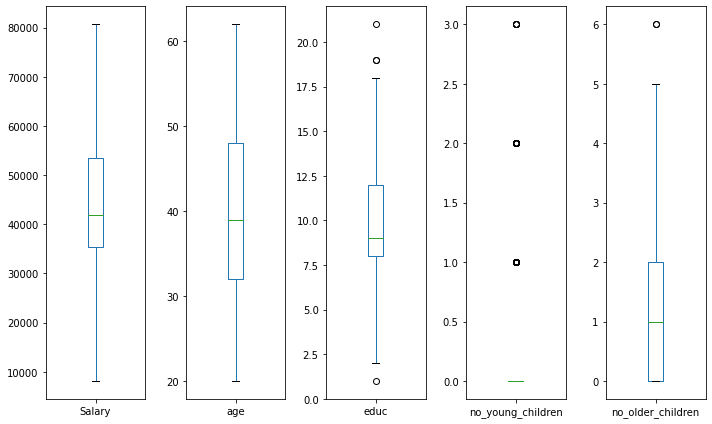

In [ ]:
# Checking for the outliers
df1.iloc[:,1:6].plot(kind = 'box', subplots = True, figsize= (10,6))
plt.tight_layout();

In [ ]:
df1['no_young_children'].nunique()

4

In [ ]:
df1['no_older_children'].nunique()

7

In [ ]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30,8,1,1,no
1,yes,37207.0,45,8,0,1,no
2,no,58022.0,46,9,0,0,no
3,no,66503.0,31,11,2,0,no
4,no,66734.0,44,12,0,2,no


In [ ]:
df1['Holliday_Package'] = df1['Holliday_Package'].replace({'no':0, 'yes':1})

In [ ]:
df1['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [ ]:
df1 = pd.get_dummies(df1, drop_first=True)

In [ ]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [ ]:
# dum1 = pd.get_dummies(df1['no_young_children'], drop_first=True)

In [ ]:
# dum1.head()

In [ ]:
# dum2 = pd.get_dummies(df1['no_older_children'], drop_first=True)

In [ ]:
 # dum2.head()

In [ ]:
# dum3 = pd.get_dummies(df1['foreign'], drop_first=True)

In [ ]:
# dum3.head()

In [ ]:
# df1 = pd.concat([['df1', 'dum1', 'dum2','dum3']], axis=1)
# df1.head()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Copy all the predictor variables into X dataframe
X = df1.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df1.pop('Holliday_Package')

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [ ]:
# X_test = scaler.transform(X_test)

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)


model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

### Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
### Getting the Predicted Probabilities
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


In [ ]:
## Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

<Figure size 576x360 with 0 Axes>

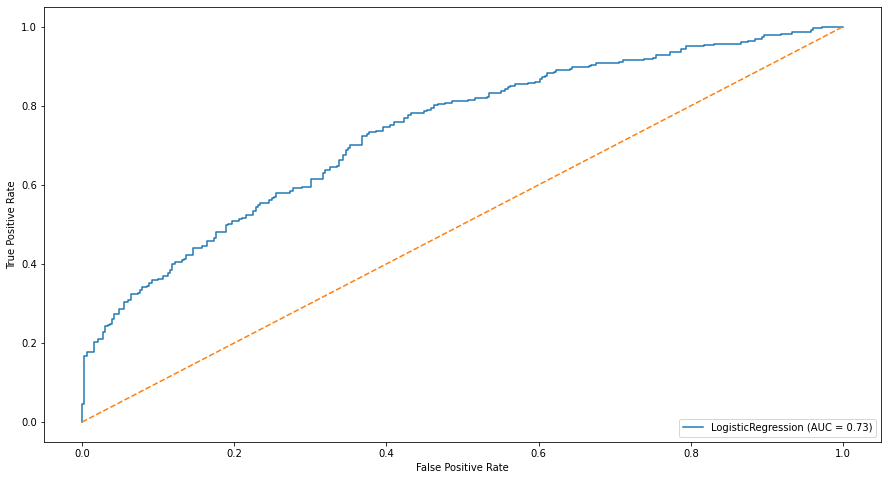

In [ ]:
### AUC and ROC for the training data
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plt.figure(figsize=(8,5))
plot_roc_curve(model, X_train,y_train)
plt.plot([0, 1], [0, 1], linestyle='--');

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.648854961832061

<Figure size 576x360 with 0 Axes>

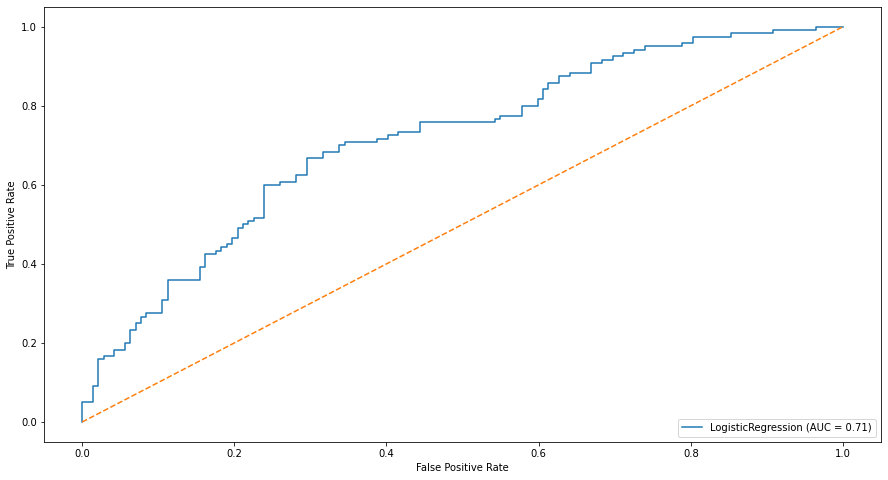

In [ ]:
### AUC and ROC for the training data
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plt.figure(figsize=(8,5))
plot_roc_curve(model, X_test, y_test);
plt.plot([0,1],[0,1], linestyle='--');

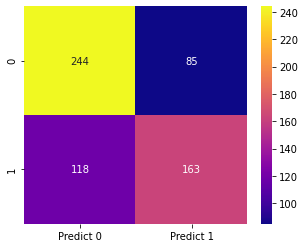

In [ ]:
# Confusion Metrix for Training Data
from sklearn import metrics
cm = metrics.confusion_matrix(y_train,ytrain_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

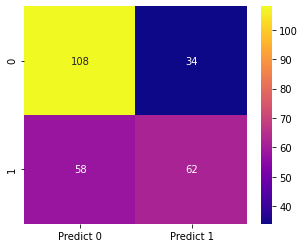

In [ ]:
# Confusion Metrix for Testing Data
cm = metrics.confusion_matrix(y_test,ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

In [ ]:
# Classification report for Trainig Data
from sklearn.metrics import classification_report
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [ ]:
print(classification_report(y_test, ytest_predict ))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



# Linear Discriminant Analysis

In [ ]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int64

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [ ]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1


In [ ]:
#Build LDA Model & Train
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)
      
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)

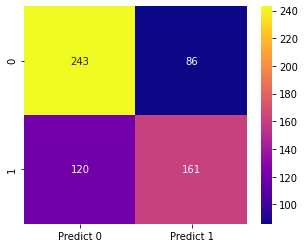

In [ ]:
# Confusion Metrix for Training Data
cm = metrics.confusion_matrix(y_train,pred_class_train, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

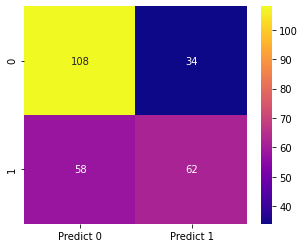

In [ ]:
# Confusion Metrix for Testing Data
cm = metrics.confusion_matrix(y_test,pred_class_test, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['0','1']], columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, cmap='plasma', fmt='g');

In [ ]:
# Classification report for Trainig Data
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_class_train ))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [ ]:
# Classification report for Testing Data
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class_test ))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



<Figure size 576x360 with 0 Axes>

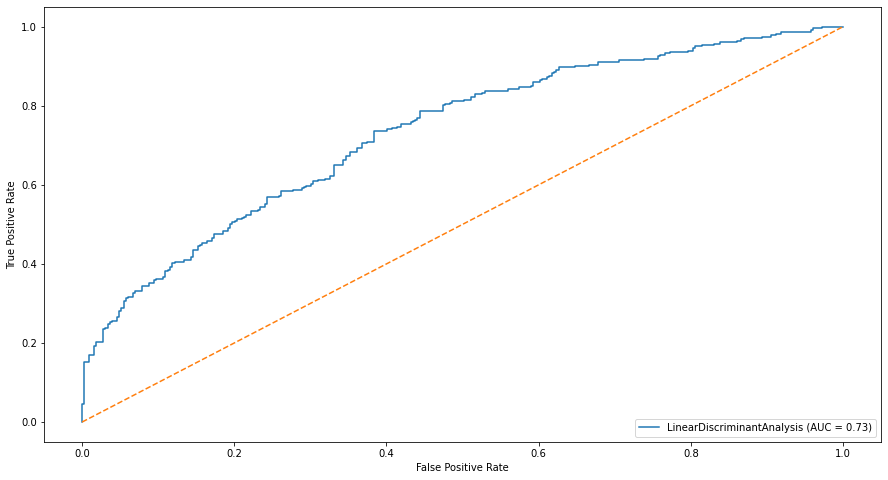

In [ ]:
### AUC and ROC for the training data
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plt.figure(figsize=(8,5))
plot_roc_curve(model1, X_train,y_train)
plt.plot([0, 1], [0, 1], linestyle='--');

<Figure size 576x360 with 0 Axes>

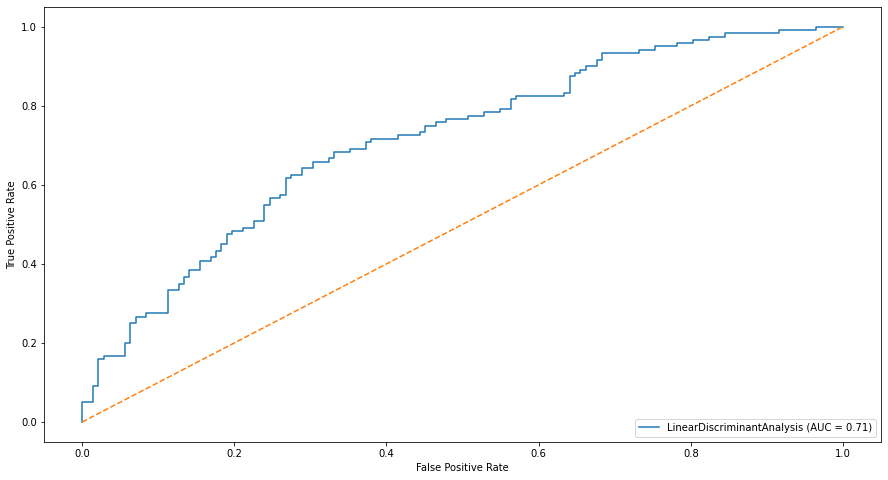

In [ ]:
### AUC and ROC for the training data
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
plt.figure(figsize=(8,5))
plot_roc_curve(model1, X_test,y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

In [ ]:
# Converting ipynb to html
! jupyter nbconvert --to html Project _Predictive _Modeling.ipynb

[NbConvertApp] WARNING | pattern u'Project' matched no files
[NbConvertApp] WARNING | pattern u'_Predictive' matched no files
[NbConvertApp] WARNING | pattern u'_Modeling.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
   